#Tugas Capstone Bengkel Koding
##Nama : Syallom Christian
##NIM  : A11.2022.14384

Link file all : https://drive.google.com/drive/folders/1b5TbkWHwxtVNNOFI72Z9qYzi8ObxFzeK?usp=sharing

Link github   : https://github.com/syallomchristian/Capstone_Project_BengKod_DataScience

##1. Import Lib

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##2. Import Dataset

In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/My Drive/Project_CAPSTONE_BengKod')

df = pd.read_csv('/content/drive/My Drive/Project_CAPSTONE_BengKod/ObesityDataSet.csv')


Mounted at /content/drive


In [45]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


##3. EDA

In [46]:
# Ringkasan informasi dataset
info = df.info()

# Cek nilai yang hilang
missing_values = df.isnull().sum()

# Statistik deskriptif untuk kolom numerik
desc_stats = df.describe()

info, missing_values, desc_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

(None,
 Age                               14
 Gender                             9
 Height                            12
 Weight                            11
 CALC                               5
 FAVC                              11
 FCVC                               8
 NCP                               12
 SCC                               10
 SMOKE                              5
 CH2O                               6
 family_history_with_overweight    13
 FAF                                8
 TUE                                9
 CAEC                              11
 MTRANS                             6
 NObeyesdad                         0
 dtype: int64,
          Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
 count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
 unique  1394      3   1562   1518          5     3   808   637     3     3   
 top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
 freq     124   

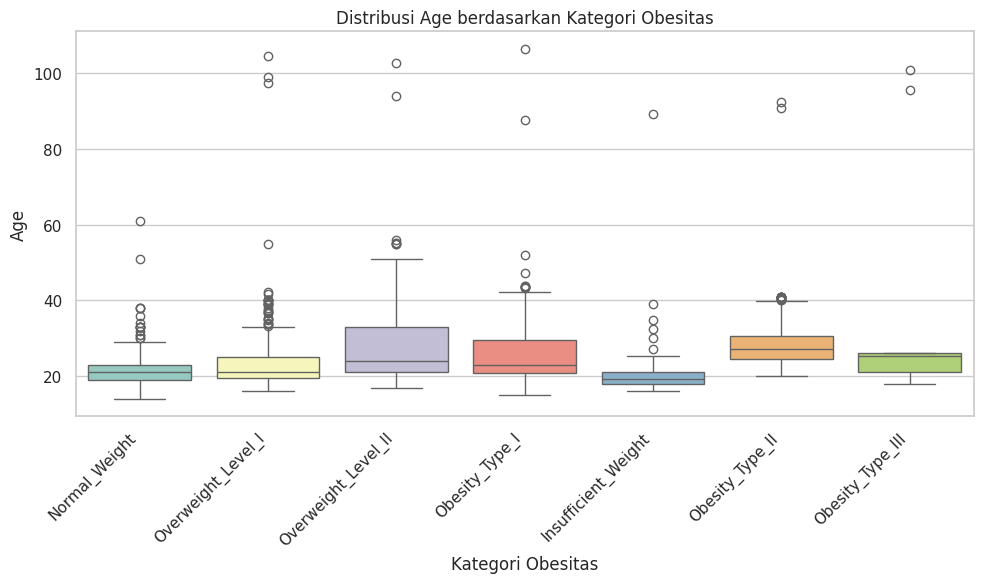

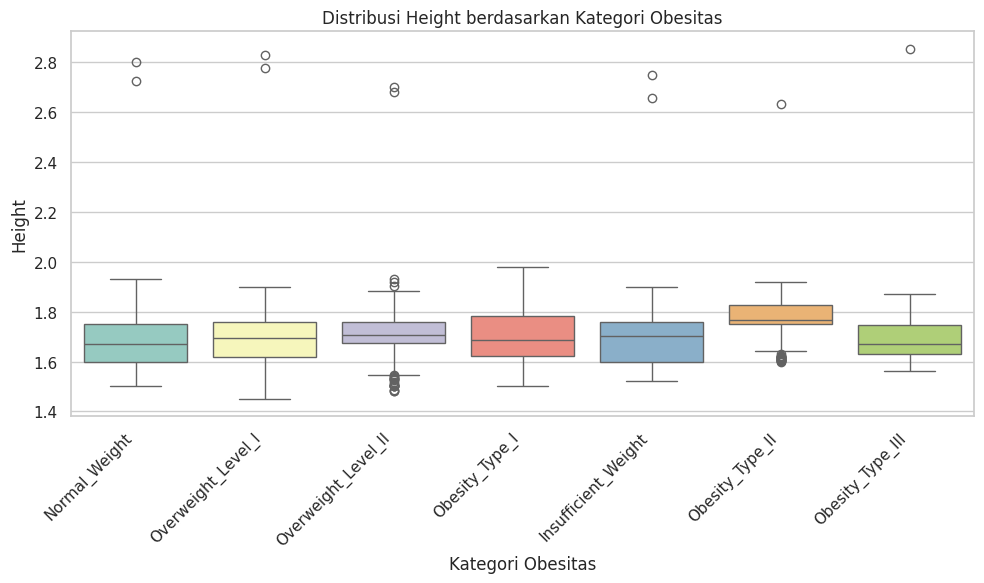

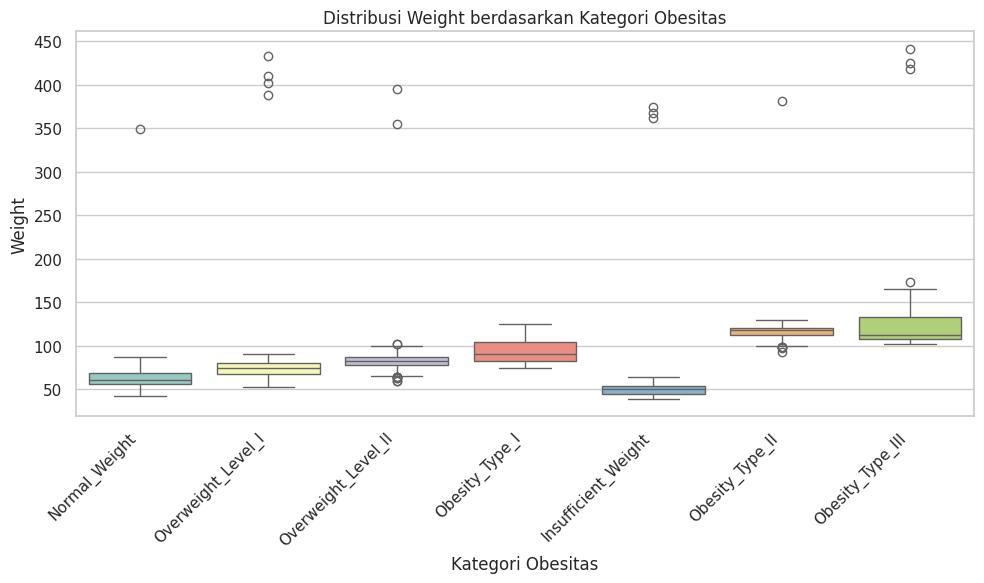

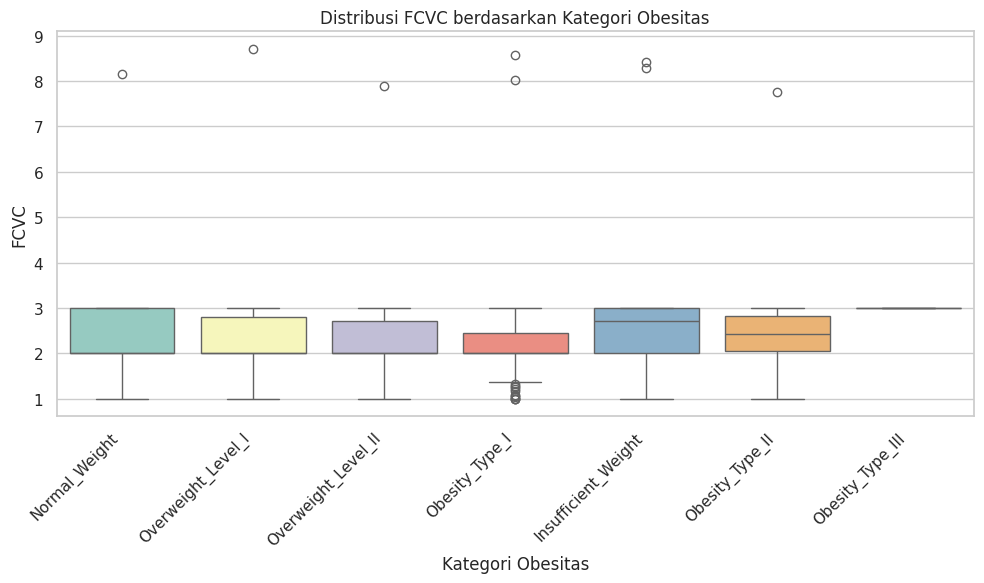

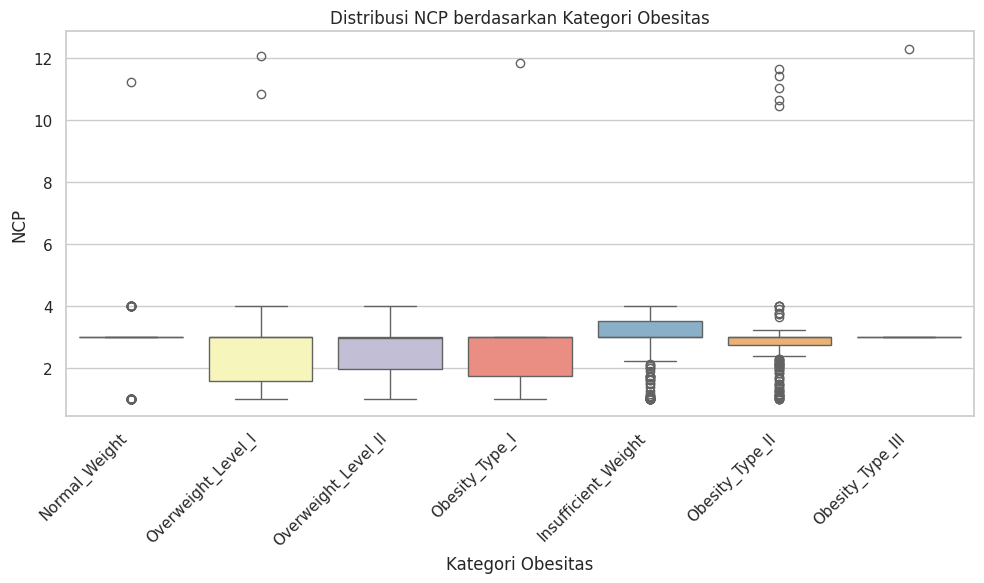

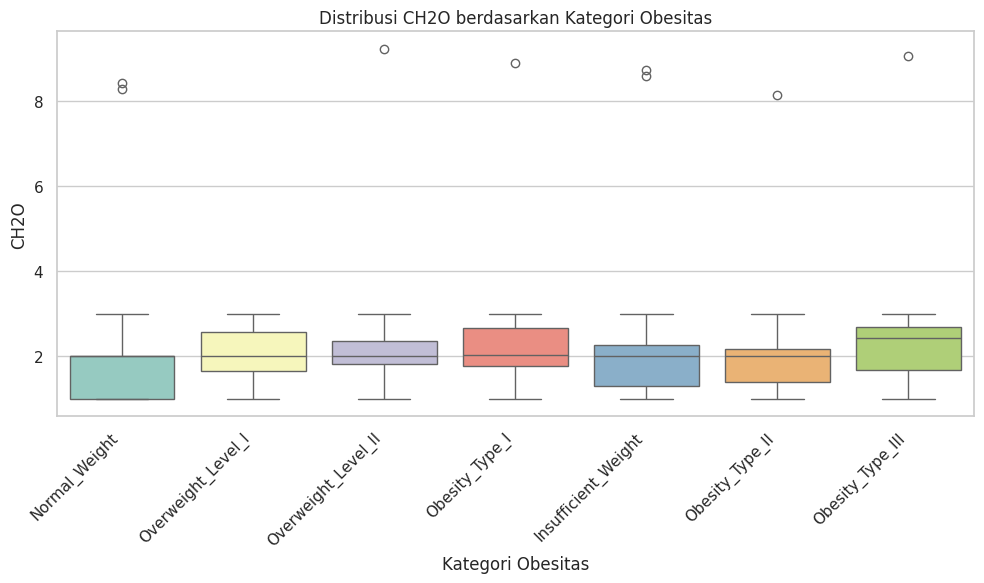

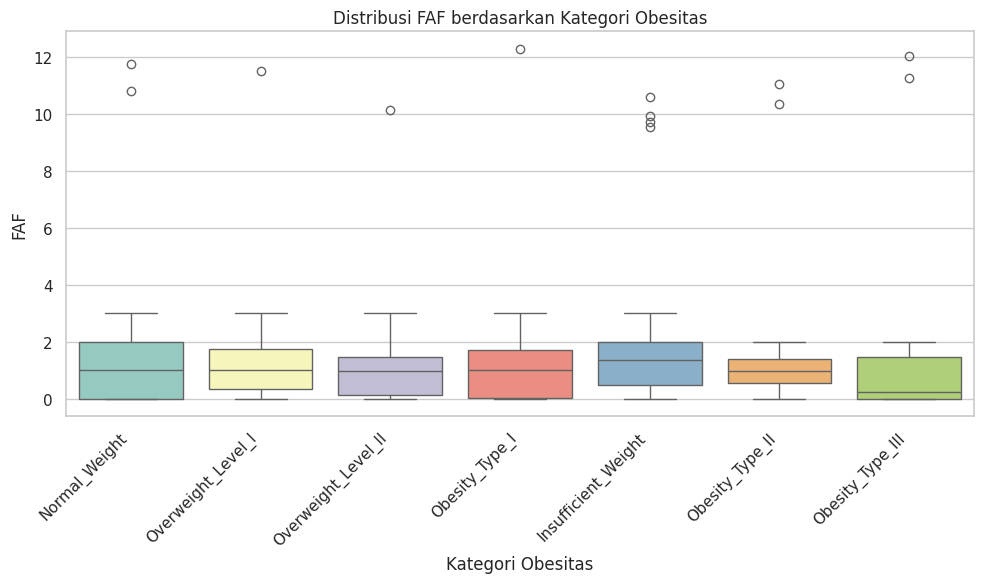

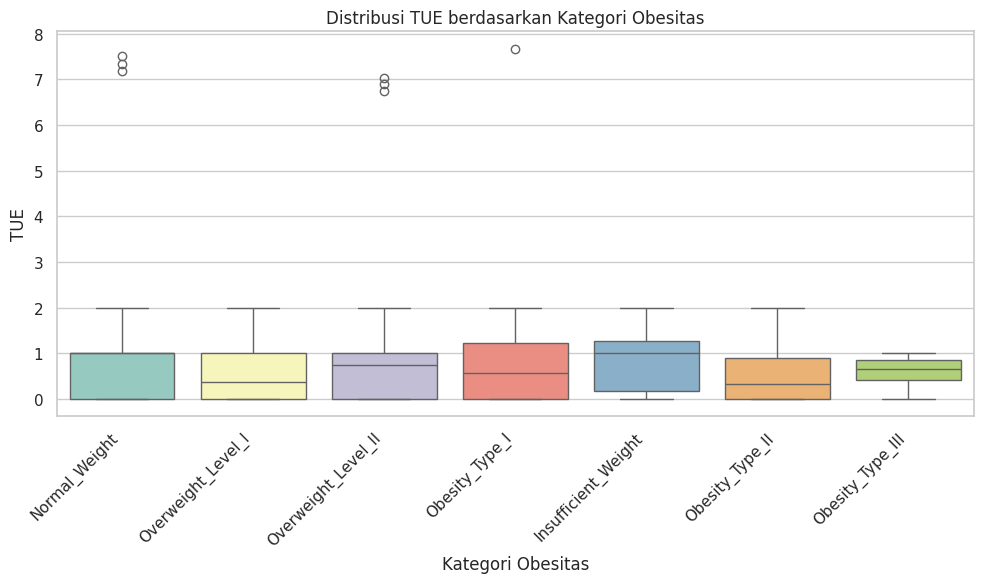

In [47]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Ubah nilai tidak valid menjadi NaN pada kolom numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus NaN
df_cleaned = df.dropna(subset=numerical_columns + ['NObeyesdad']) # Hapus baris dengan NaN di kolom numerik atau target

# Buat boxplot
sns.set_theme(style="whitegrid")
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad', y=col, hue='NObeyesdad', data=df_cleaned, palette='Set3', legend=False)
    plt.title(f'Distribusi {col} berdasarkan Kategori Obesitas')
    plt.xlabel('Kategori Obesitas')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')      # Putar dan rapikan label
    plt.subplots_adjust(bottom=0.25)         # Tambah jarak bawah agar tidak bertabrakan
    plt.tight_layout()
    plt.show()

In [48]:
# Cek missing values per kolom
missing_values = df.isnull().sum()
#print("Jumlah Missing Values per Kolom:\n", missing_values)
print(missing_values)

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [49]:
# Cek unique values per kolom
unique_values = df.nunique()
print("\nJumlah Unique Values per Kolom:\n", unique_values)



Jumlah Unique Values per Kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [50]:
print("\nUnique values pada semua kolom:")
for col in df.columns:
    print(f"- {col}: {df[col].unique()}")



Unique values pada semua kolom:
- Age: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
- Gender: ['Female' 'Male' '?' nan]
- Height: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
- Weight: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
- CALC: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
- FAVC: ['no' 'yes' '?' nan]
- FCVC: [2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844   1.757466   2.9

In [51]:
# Cek data duplikat
# Jumlah total baris duplikat (seluruh baris sama persis)
total_duplikat = df.duplicated().sum()
print("Total baris duplikat:", total_duplikat)
print("--------------------------------")

# Tampilkan baris yang terduplikat
duplikat = df[df.duplicated()]
print("Baris duplikat:")
print(duplikat)

# Ambil satu contoh baris duplikat
if not duplikat.empty:
    ref = duplikat.iloc[0]
    matching_cols = df.columns[(df == ref).all(axis=0)]
    print("Kolom yang identik di baris duplikat contoh:", list(matching_cols))


Total baris duplikat: 18
--------------------------------
Baris duplikat:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
663  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
763  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
764  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
824  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
830  21.0    Male    1.62    70.0  Sometimes  


Distribusi Keseimbangan Data (NObeyesdad):
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


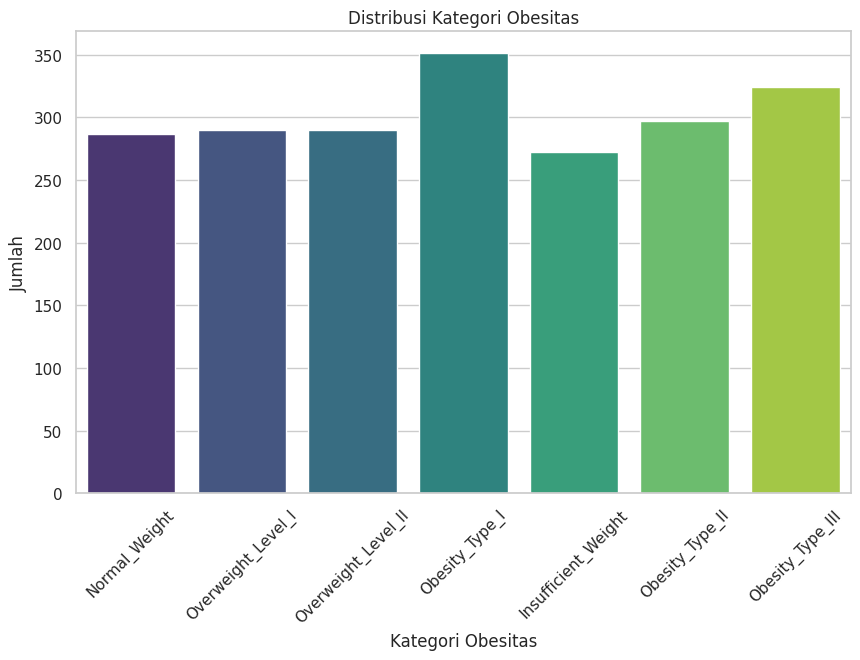

In [52]:
# Cek keseimbangan data pada kolom target 'NObeyesdad'
class_distribution = df['NObeyesdad'].value_counts()
print("\nDistribusi Keseimbangan Data (NObeyesdad):\n", class_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', palette='viridis', legend=False)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

<ipython-input-53-4972a78b9657>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')


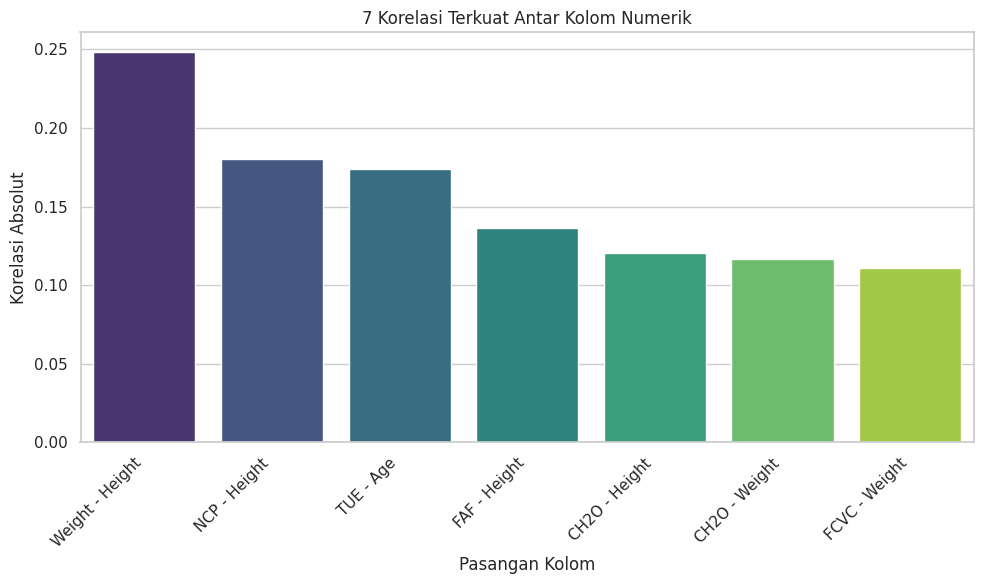

In [53]:
# Konversi kolom numerik ke tipe data numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan missing values di kolom numerik
df_cleaned = df.dropna(subset=numerical_columns)

# Hitung matriks korelasi
correlation_matrix = df_cleaned[numerical_columns].corr()

# Ambil nilai korelasi absolut dan urutkan
abs_corr_matrix = np.abs(correlation_matrix)
upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
strong_correlations = upper_triangle.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations.dropna()  # Hapus NaN

# Pilih 7 korelasi teratas
top_7_correlations = strong_correlations.head(7)

# Siapkan data untuk diagram batang
correlation_data = pd.DataFrame({
    'Pair': [f"{pair[0]} - {pair[1]}" for pair in top_5_correlations.index],
    'Correlation': top_5_correlations.values
})

# Visualisasikan dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')
plt.title('7 Korelasi Terkuat Antar Kolom Numerik')
plt.xlabel('Pasangan Kolom')
plt.ylabel('Korelasi Absolut')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar terbaca
plt.tight_layout()  # Untuk mencegah label tumpang tindih
plt.show()

###  **Top 7 Korelasi Tertinggi (dalam nilai absolut)**

| Pasangan Fitur       | Korelasi | Analisis                                                                 |
|----------------------|----------|--------------------------------------------------------------------------|
| **Weight – Height**  | 0.248    | Positif lemah: Orang dengan tinggi badan lebih besar cenderung memiliki berat lebih tinggi, meskipun hubungan ini tidak terlalu kuat. |
| **NCP – Height**     | 0.180    | Korelasi lemah: Orang dengan tinggi tertentu cenderung memiliki pola makan besar tertentu, tetapi korelasinya lemah. |
| **TUE – Age**        | 0.174    | Korelasi lemah: Usia memengaruhi durasi penggunaan teknologi; kemungkinan, kelompok usia muda cenderung lebih banyak menggunakan perangkat. |
| **FAF – Height**     | 0.136    | Korelasi sangat lemah: Tinggi badan sedikit berkorelasi dengan aktivitas fisik, bisa jadi orang lebih tinggi lebih aktif secara umum. |
| **CH2O – Height**    | 0.121    | Korelasi sangat lemah: Tinggi badan sedikit berkaitan dengan konsumsi air harian, tetapi tidak signifikan. |
| **CH2O – Weight**    | 0.117    | Korelasi sangat lemah: Berat badan memiliki sedikit hubungan dengan konsumsi air, tetapi tidak cukup kuat untuk disimpulkan. |
| **FCVC – Weight**    | 0.111    | Korelasi sangat lemah: Konsumsi sayuran berkaitan sedikit dengan berat badan; bisa berarti diet sehat sedikit mempengaruhi berat. |



###  **Kesimpulan Analisis Korelasi**

- Tidak ada korelasi yang **kuat** antar fitur numerik (semuanya < 0.3).
- Korelasi tertinggi pun (`Weight – Height`) hanya 0.25, yang termasuk **lemah**.
- Ini menunjukkan bahwa **tidak ada dua fitur numerik** dalam dataset ini yang sangat linear satu sama lain.
- Hal ini baik untuk pemodelan, karena tidak ada multikolinearitas tinggi yang bisa merusak performa model prediktif berbasis regresi atau pohon keputusan.
